In [1]:
#导入常用python包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
#导入csv数据集
data = pd.read_csv('edata.csv',encoding='gbk')

In [3]:
#查看前十条数据
data.head(10)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
5,15,518072,20180507121233054000000388275132,卡号1,0.02,0.98,2000,7.59,1.00,0.733,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.0,4.0
6,16,1205125,20180507121931540000000388298915,卡号1,0.02,0.98,0,23.67,0.94,0.087,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.0,3.0
7,18,1129897,20180507124659235000000023105807,卡号1,0.02,0.98,0,0.25,0.88,0.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20,2599411,20180507115855621000000388224458,卡号1,0.03,0.65,0,0.31,0.76,0.472,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.0,7.0
9,26,1413051,20180504155156296000000021138084,卡号1,0.01,0.99,500,0.80,1.00,0.088,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,142.0


In [4]:
#查看数据形状
print(data.shape)

(4754, 90)


In [5]:
#查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [6]:
#对数据进行处理，对每列缺失数据加和
print ('data dataset ({} rows) null value:\n'.format(data.shape[0]))
print (data.isnull().sum(axis = 0))

data dataset (4754 rows) null value:

Unnamed: 0                                  0
custid                                      0
trade_no                                    0
bank_card_no                                0
low_volume_percent                          2
middle_volume_percent                       2
take_amount_in_later_12_month_highest       0
trans_amount_increase_rate_lately           3
trans_activity_month                        2
trans_activity_day                          2
transd_mcc                                  2
trans_days_interval_filter                  8
trans_days_interval                         2
regional_mobility                           2
student_feature                          2998
repayment_capability                        0
is_high_user                                0
number_of_trans_from_2011                   2
first_transaction_time                      2
historical_trans_amount                     0
historical_trans_day                      

In [7]:
#筛选object类型的数据
obj_vars = []
def find_object(df):
    print('object类型变量：')
    for col in df.columns:
        if df[col].dtype =='object':
            obj_vars.append(col)
    return obj_vars

In [8]:
find_object(data)

object类型变量：


['trade_no',
 'bank_card_no',
 'reg_preference_for_trad',
 'source',
 'id_name',
 'latest_query_time',
 'loans_latest_time']

In [9]:
#观察object类型的值分布
for col in obj_vars:
    print('描述型变量{col}的分布为：'.format(col=col))
    print(data[col].value_counts())
    print('\n')

描述型变量trade_no的分布为：
20180504181145414000000381809948    1
20180507114716408000000023048797    1
20180504161017507000000021154576    1
20180507124243775000000388391797    1
20180507115420113000000388206418    1
20180507123119600000000388351102    1
20180507123806690000000388380295    1
20180507114649873000000023047864    1
20180507124011468000000388384045    1
20180507120924740000000388260958    1
20180507123117026000000388354235    1
20180507123734831000000388377177    1
20180507123849836000000388377041    1
20180507123305361000000023092671    1
20180507115000166000000388191966    1
20180507115904156000000388225199    1
20180507124817326000000023107221    1
20180507115126545000000023056129    1
20180507123911735000000023097917    1
20180507122525302000000388325132    1
20180507121026581000000388265964    1
20180504155449974000000381245833    1
20180504180416623000000381794455    1
20180507122712230000000388336355    1
20180507114729079000000023049347    1
2018050712185413300000038829581

In [10]:
#移除特征：检查每个特征的取值，删除单值特征
def find_feaures(df):
    single_features =[]
    for col in df.columns:
        cnt = df[col].value_counts().count()
        print('{col}的取值有{cnt}个'.format(col=col,cnt=cnt))
        if cnt ==1:
            single_features.append(col)
    return single_features

In [11]:
find_feaures(data)

Unnamed: 0的取值有4754个
custid的取值有4754个
trade_no的取值有4754个
bank_card_no的取值有1个
low_volume_percent的取值有40个
middle_volume_percent的取值有90个
take_amount_in_later_12_month_highest的取值有166个
trans_amount_increase_rate_lately的取值有782个
trans_activity_month的取值有84个
trans_activity_day的取值有512个
transd_mcc的取值有41个
trans_days_interval_filter的取值有147个
trans_days_interval的取值有114个
regional_mobility的取值有5个
student_feature的取值有2个
repayment_capability的取值有2390个
is_high_user的取值有2个
number_of_trans_from_2011的取值有70个
first_transaction_time的取值有1693个
historical_trans_amount的取值有4524个
historical_trans_day的取值有476个
rank_trad_1_month的取值有20个
trans_amount_3_month的取值有3524个
avg_consume_less_12_valid_month的取值有12个
abs的取值有1697个
top_trans_count_last_1_month的取值有8个
avg_price_last_12_month的取值有330个
avg_price_top_last_12_valid_month的取值有20个
reg_preference_for_trad的取值有5个
trans_top_time_last_1_month的取值有28个
trans_top_time_last_6_month的取值有97个
consume_top_time_last_1_month的取值有28个
consume_top_time_last_6_month的取值有94个
cross_consume_count_last_1_month的取值有1

['bank_card_no', 'source']

In [12]:
#删除缺失值最多的特征、单值特征、描述型特征
del_col =['student_feature','bank_card_no','source','Unnamed: 0','custid','trade_no','historical_trans_amount','id_name','latest_query_time','loans_latest_time']
df_1 =data.drop(columns=del_col)

In [13]:
df_1.shape

(4754, 80)

In [14]:
df_1['reg_preference_for_trad'].fillna('其他城市',inplace = True)

In [15]:
df_1['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       6
Name: reg_preference_for_trad, dtype: int64

In [16]:
city_mapDict ={'一线城市':1,'二线城市':2,'三线城市':3,'其他城市':4,'境外':0}
df_1['reg_preference_for_trad']=df_1['reg_preference_for_trad'].map(city_mapDict)

In [17]:
df_1['reg_preference_for_trad'].value_counts()

1    3403
3    1064
0     150
2     131
4       6
Name: reg_preference_for_trad, dtype: int64

In [18]:
missing_data = df_1.isnull().sum()

In [19]:
#对于数值型数据采用平均值补充
for index in missing_data.keys():
    if df_1[index].dtype!=object:
        df_1[index].fillna(df_1[index].mean(),inplace=True)
    else:
        print('object类型有',index,missing_data[index])

In [20]:
df_1.isnull().sum()

low_volume_percent                        0
middle_volume_percent                     0
take_amount_in_later_12_month_highest     0
trans_amount_increase_rate_lately         0
trans_activity_month                      0
trans_activity_day                        0
transd_mcc                                0
trans_days_interval_filter                0
trans_days_interval                       0
regional_mobility                         0
repayment_capability                      0
is_high_user                              0
number_of_trans_from_2011                 0
first_transaction_time                    0
historical_trans_day                      0
rank_trad_1_month                         0
trans_amount_3_month                      0
avg_consume_less_12_valid_month           0
abs                                       0
top_trans_count_last_1_month              0
avg_price_last_12_month                   0
avg_price_top_last_12_valid_month         0
reg_preference_for_trad         

In [21]:
df_1.isnull().sum()[df_1.isnull().sum() != 0 ]

Series([], dtype: int64)

In [22]:
#取出目标值，对剩下的特征进行标准化
y =df_1['status']
df_2=df_1.drop('status',axis=1)

In [23]:
df_2.head(10)

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,2900.000000,1688.000000,1200.000000,75.00000,1.000000,2.000000,1200.000000,1200.000000,12.000000,18.000000
1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,3500.000000,1758.000000,15100.000000,80.00000,5.000000,6.000000,22800.000000,9360.000000,4.000000,2.000000
2,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1600.000000,1250.000000,4200.000000,87.00000,1.000000,1.000000,4200.000000,4200.000000,2.000000,6.000000
3,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,3200.000000,1541.000000,16300.000000,80.00000,5.000000,5.000000,30000.000000,12180.000000,2.000000,4.000000
4,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,2300.000000,1630.000000,8300.000000,79.00000,2.000000,2.000000,8400.000000,8250.000000,22.000000,120.000000
5,0.02,0.98,2000,7.59,1.00,0.733,27.0,8.0,11.0,3.0,...,5300.000000,1941.000000,11200.000000,80.00000,10.000000,12.000000,20400.000000,8130.000000,3.000000,4.000000
6,0.02,0.98,0,23.67,0.94,0.087,10.0,54.0,53.0,2.0,...,2200.000000,2200.000000,7600.000000,73.00000,2.000000,2.000000,16800.000000,8900.000000,1.000000,3.000000
7,0.02,0.98,0,0.25,0.88,0.302,19.0,20.0,20.0,2.0,...,3390.038142,1820.357864,9187.009199,76.04263,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
8,0.03,0.65,0,0.31,0.76,0.472,15.0,21.0,14.0,2.0,...,5300.000000,4750.000000,5500.000000,79.00000,8.000000,11.000000,19200.000000,7987.000000,24.000000,7.000000
9,0.01,0.99,500,0.80,1.00,0.088,15.0,36.0,35.0,2.0,...,2800.000000,1520.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,18.000000,142.000000


In [24]:
#将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_3 = scaler.fit_transform(df_2)
df_3 = pd.DataFrame(df_3,columns=df_2.columns)

C:\Users\Nicolas\Anaconda3\envs\py3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nicolas\Anaconda3\envs\py3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
#将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_4 = scaler.fit_transform(df_1)
df_4 = pd.DataFrame(df_4,columns=df_1.columns)

C:\Users\Nicolas\Anaconda3\envs\py3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nicolas\Anaconda3\envs\py3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
df_3.head(10)

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,-0.284375,0.612565,-0.494499,-0.019111,-1.292355,-0.308126,-0.112410,-0.089420,0.257973,0.361022,...,-3.433433e-01,-0.234329,-1.119179,-0.074083,-1.296013,-0.977822,-1.080035e+00,-1.238093,-0.331899,-0.718027
1,-0.043493,0.267286,0.015242,-0.018563,0.993553,0.544101,0.334597,0.042733,-0.470637,1.484517,...,7.704434e-02,-0.110400,0.828557,0.281186,0.092945,0.234038,4.800318e-01,0.245939,-0.551104,-1.027009
2,0.438272,0.405398,-0.494499,-0.018967,0.993553,-1.477734,-1.006424,1.716675,0.015103,-1.885968,...,-1.254183e+00,-1.009774,-0.698804,0.778563,-1.296013,-1.280788,-8.633591e-01,-0.692493,-0.605905,-0.949763
3,-0.525258,0.405398,0.015242,-0.020220,-1.190759,2.419000,1.005107,-0.662084,-0.956377,0.361022,...,-1.331495e-01,-0.494581,0.996707,0.281186,0.092945,-0.068927,1.000054e+00,0.758803,-0.605905,-0.988386
4,-0.284375,0.612565,-0.494499,-0.019745,0.993553,-1.119211,-1.006424,1.628572,1.229453,-1.885968,...,-7.637309e-01,-0.337014,-0.124292,0.210133,-0.948773,-0.977822,-5.600128e-01,0.044067,-0.057892,1.251735
5,-0.043493,0.543510,0.015242,-0.009469,0.993553,2.160394,2.122624,-0.926391,-0.652790,0.361022,...,1.338207e+00,0.213588,0.282070,0.281186,1.829142,2.051830,3.066910e-01,0.022243,-0.578505,-0.988386
6,-0.043493,0.543510,-0.494499,0.013704,0.688765,-1.636424,-1.676934,1.099959,1.897345,-0.762473,...,-8.337955e-01,0.672127,-0.222380,-0.216191,-0.948773,-0.977822,4.667988e-02,0.162280,-0.633306,-1.007698
7,-0.043493,0.543510,-0.494499,-0.020047,0.383978,-0.372778,0.334597,-0.397778,-0.106332,-0.762473,...,3.186169e-16,0.000000,0.000000,0.000000,0.000000,0.000000,-1.313771e-16,0.000000,0.000000,0.000000
8,0.197390,-1.735333,-0.494499,-0.019961,-0.225598,0.626385,-0.559417,-0.353727,-0.470637,-0.762473,...,1.338207e+00,5.186705,-0.516642,0.210133,1.134663,1.748864,2.200206e-01,-0.003764,-0.003091,-0.930452
9,-0.284375,0.612565,-0.367064,-0.019255,0.993553,-1.630547,-0.559417,0.307040,0.804430,-0.762473,...,-4.134079e-01,-0.531760,-1.287329,-5.403122,-1.643252,-1.583753,-1.166705e+00,-1.456333,-0.167495,1.676586


In [27]:
#相关性矩阵
corrDf = df_3.corr()
corrDf

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
low_volume_percent,1.000000,-0.151504,-0.066043,0.005331,0.023895,-0.093754,-0.095780,0.051379,0.062421,-0.042939,...,-0.137875,-0.126062,-0.082631,-0.032009,-0.073641,-0.066140,-0.095087,-0.093100,0.066051,0.046728
middle_volume_percent,-0.151504,1.000000,-0.135043,0.001608,-0.031743,-0.055491,-0.094736,0.009936,-0.000383,0.009671,...,-0.140026,-0.106025,-0.147412,0.003142,-0.007466,-0.014282,-0.163125,-0.167502,-0.001569,-0.003129
take_amount_in_later_12_month_highest,-0.066043,-0.135043,1.000000,-0.006698,0.060994,0.112577,0.181426,-0.055307,-0.053326,0.024088,...,0.070772,0.038325,0.038766,0.015615,0.021081,0.021032,0.053655,0.040053,-0.000562,-0.010084
trans_amount_increase_rate_lately,0.005331,0.001608,-0.006698,1.000000,0.015388,-0.003060,-0.011629,0.013218,0.000521,-0.026950,...,0.007114,0.000120,0.028865,0.006173,-0.019897,-0.019598,0.007122,0.040861,-0.001457,0.027215
trans_activity_month,0.023895,-0.031743,0.060994,0.015388,1.000000,0.063373,0.069272,-0.091610,-0.151579,-0.219911,...,0.059770,0.036028,-0.035594,-0.000387,0.003220,0.005349,-0.021641,-0.042304,-0.023346,-0.014382
trans_activity_day,-0.093754,-0.055491,0.112577,-0.003060,0.063373,1.000000,0.674547,-0.490756,-0.542118,0.143697,...,0.431191,0.195930,0.093616,0.175519,0.536241,0.533972,0.217522,0.082602,-0.183134,-0.289773
transd_mcc,-0.095780,-0.094736,0.181426,-0.011629,0.069272,0.674547,1.000000,-0.404966,-0.447308,0.114936,...,0.304208,0.160956,0.064260,0.127941,0.360025,0.363386,0.152234,0.055931,-0.116835,-0.205214
trans_days_interval_filter,0.051379,0.009936,-0.055307,0.013218,-0.091610,-0.490756,-0.404966,1.000000,0.682997,-0.124161,...,-0.215823,-0.114652,-0.053487,-0.137813,-0.278004,-0.277167,-0.107879,-0.044375,0.067141,0.158174
trans_days_interval,0.062421,-0.000383,-0.053326,0.000521,-0.151579,-0.542118,-0.447308,0.682997,1.000000,-0.143015,...,-0.263824,-0.158245,-0.033697,-0.099576,-0.277256,-0.278089,-0.101917,-0.024014,0.099060,0.173365
regional_mobility,-0.042939,0.009671,0.024088,-0.026950,-0.219911,0.143697,0.114936,-0.124161,-0.143015,1.000000,...,0.096610,0.060780,0.089946,0.052424,0.142598,0.140855,0.088351,0.076812,-0.050217,-0.103838


In [28]:
df_4.head(10)

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,-0.284375,0.612565,-0.494499,-0.019111,-1.292355,-0.308126,-0.112410,-0.089420,0.257973,0.361022,...,-3.433433e-01,-0.234329,-1.119179,-0.074083,-1.296013,-0.977822,-1.080035e+00,-1.238093,-0.331899,-0.718027
1,-0.043493,0.267286,0.015242,-0.018563,0.993553,0.544101,0.334597,0.042733,-0.470637,1.484517,...,7.704434e-02,-0.110400,0.828557,0.281186,0.092945,0.234038,4.800318e-01,0.245939,-0.551104,-1.027009
2,0.438272,0.405398,-0.494499,-0.018967,0.993553,-1.477734,-1.006424,1.716675,0.015103,-1.885968,...,-1.254183e+00,-1.009774,-0.698804,0.778563,-1.296013,-1.280788,-8.633591e-01,-0.692493,-0.605905,-0.949763
3,-0.525258,0.405398,0.015242,-0.020220,-1.190759,2.419000,1.005107,-0.662084,-0.956377,0.361022,...,-1.331495e-01,-0.494581,0.996707,0.281186,0.092945,-0.068927,1.000054e+00,0.758803,-0.605905,-0.988386
4,-0.284375,0.612565,-0.494499,-0.019745,0.993553,-1.119211,-1.006424,1.628572,1.229453,-1.885968,...,-7.637309e-01,-0.337014,-0.124292,0.210133,-0.948773,-0.977822,-5.600128e-01,0.044067,-0.057892,1.251735
5,-0.043493,0.543510,0.015242,-0.009469,0.993553,2.160394,2.122624,-0.926391,-0.652790,0.361022,...,1.338207e+00,0.213588,0.282070,0.281186,1.829142,2.051830,3.066910e-01,0.022243,-0.578505,-0.988386
6,-0.043493,0.543510,-0.494499,0.013704,0.688765,-1.636424,-1.676934,1.099959,1.897345,-0.762473,...,-8.337955e-01,0.672127,-0.222380,-0.216191,-0.948773,-0.977822,4.667988e-02,0.162280,-0.633306,-1.007698
7,-0.043493,0.543510,-0.494499,-0.020047,0.383978,-0.372778,0.334597,-0.397778,-0.106332,-0.762473,...,3.186169e-16,0.000000,0.000000,0.000000,0.000000,0.000000,-1.313771e-16,0.000000,0.000000,0.000000
8,0.197390,-1.735333,-0.494499,-0.019961,-0.225598,0.626385,-0.559417,-0.353727,-0.470637,-0.762473,...,1.338207e+00,5.186705,-0.516642,0.210133,1.134663,1.748864,2.200206e-01,-0.003764,-0.003091,-0.930452
9,-0.284375,0.612565,-0.367064,-0.019255,0.993553,-1.630547,-0.559417,0.307040,0.804430,-0.762473,...,-4.134079e-01,-0.531760,-1.287329,-5.403122,-1.643252,-1.583753,-1.166705e+00,-1.456333,-0.167495,1.676586


In [29]:
#相关性矩阵
corrDf4 = df_4.corr()
corrDf4

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
low_volume_percent,1.000000,-0.151504,-0.066043,0.005331,0.023895,-0.093754,-0.095780,0.051379,0.062421,-0.042939,...,-0.137875,-0.126062,-0.082631,-0.032009,-0.073641,-0.066140,-0.095087,-0.093100,0.066051,0.046728
middle_volume_percent,-0.151504,1.000000,-0.135043,0.001608,-0.031743,-0.055491,-0.094736,0.009936,-0.000383,0.009671,...,-0.140026,-0.106025,-0.147412,0.003142,-0.007466,-0.014282,-0.163125,-0.167502,-0.001569,-0.003129
take_amount_in_later_12_month_highest,-0.066043,-0.135043,1.000000,-0.006698,0.060994,0.112577,0.181426,-0.055307,-0.053326,0.024088,...,0.070772,0.038325,0.038766,0.015615,0.021081,0.021032,0.053655,0.040053,-0.000562,-0.010084
trans_amount_increase_rate_lately,0.005331,0.001608,-0.006698,1.000000,0.015388,-0.003060,-0.011629,0.013218,0.000521,-0.026950,...,0.007114,0.000120,0.028865,0.006173,-0.019897,-0.019598,0.007122,0.040861,-0.001457,0.027215
trans_activity_month,0.023895,-0.031743,0.060994,0.015388,1.000000,0.063373,0.069272,-0.091610,-0.151579,-0.219911,...,0.059770,0.036028,-0.035594,-0.000387,0.003220,0.005349,-0.021641,-0.042304,-0.023346,-0.014382
trans_activity_day,-0.093754,-0.055491,0.112577,-0.003060,0.063373,1.000000,0.674547,-0.490756,-0.542118,0.143697,...,0.431191,0.195930,0.093616,0.175519,0.536241,0.533972,0.217522,0.082602,-0.183134,-0.289773
transd_mcc,-0.095780,-0.094736,0.181426,-0.011629,0.069272,0.674547,1.000000,-0.404966,-0.447308,0.114936,...,0.304208,0.160956,0.064260,0.127941,0.360025,0.363386,0.152234,0.055931,-0.116835,-0.205214
trans_days_interval_filter,0.051379,0.009936,-0.055307,0.013218,-0.091610,-0.490756,-0.404966,1.000000,0.682997,-0.124161,...,-0.215823,-0.114652,-0.053487,-0.137813,-0.278004,-0.277167,-0.107879,-0.044375,0.067141,0.158174
trans_days_interval,0.062421,-0.000383,-0.053326,0.000521,-0.151579,-0.542118,-0.447308,0.682997,1.000000,-0.143015,...,-0.263824,-0.158245,-0.033697,-0.099576,-0.277256,-0.278089,-0.101917,-0.024014,0.099060,0.173365
regional_mobility,-0.042939,0.009671,0.024088,-0.026950,-0.219911,0.143697,0.114936,-0.124161,-0.143015,1.000000,...,0.096610,0.060780,0.089946,0.052424,0.142598,0.140855,0.088351,0.076812,-0.050217,-0.103838


In [30]:
#查看各个特征与status的相关系数
corrDf4['status'].sort_values(ascending=False)

status                                        1.000000
trans_fail_top_count_enum_last_1_month        0.332068
history_fail_fee                              0.310108
loans_overdue_count                           0.270469
latest_one_month_fail                         0.249290
rank_trad_1_month                             0.147247
trans_fail_top_count_enum_last_6_month        0.133401
top_trans_count_last_1_month                  0.117105
trans_fail_top_count_enum_last_12_month       0.117094
trans_day_last_12_month                       0.078887
avg_price_top_last_12_valid_month             0.071126
latest_six_month_loan                         0.060625
latest_query_day                              0.057387
query_cash_count                              0.053042
low_volume_percent                            0.051843
latest_three_month_loan                       0.051436
loans_count                                   0.046716
middle_volume_percent                         0.041129
first_tran

In [31]:
# 数据清洗且初步处理完成，下面切分数据进行训练预测
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(df_3,y,test_size=0.3,random_state=2018)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3327, 79)
(1427, 79)
(3327,)
(1427,)


In [32]:
# 使用svm训练模型
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)

C:\Users\Nicolas\Anaconda3\envs\py3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
y_pred =clf.predict(X_test)

In [34]:
clf.score(X_test,y_test)

0.7785564120532585

In [35]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.22284122562674094

In [36]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.3361344537815126

In [37]:
#LR模型
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Nicolas\Anaconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
#SVM模型
from sklearn import svm

svm_linear = svm.SVC(kernel = 'linear', probability=True).fit(X_train, y_train)
svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)
svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)

C:\Users\Nicolas\Anaconda3\envs\py3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nicolas\Anaconda3\envs\py3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nicolas\Anaconda3\envs\py3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
#决策树模型
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
#XG模型
import warnings
warnings.filterwarnings("ignore")
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率
    print('[精准率]', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率
    print('[召回率]', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('[f1-score]', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # auc取值：用roc_auc_score或auc
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # roc曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

[准确率] 训练集： 0.8007 测试集： 0.7821
[精准率] 训练集： 0.6939 测试集： 0.6364
[召回率] 训练集： 0.3669 测试集： 0.3120
[f1-score] 训练集： 0.4800 测试集： 0.4187
[auc值] 训练集： 0.8190 测试集： 0.7663


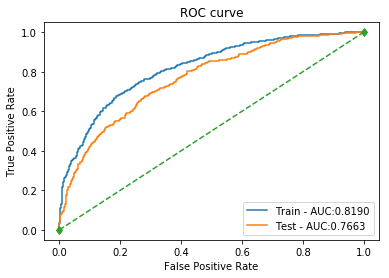

In [43]:
# 逻辑回归
model_metrics(lr, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8043 测试集： 0.7758
[精准率] 训练集： 0.7798 测试集： 0.6560
[召回率] 训练集： 0.3058 测试集： 0.2284
[f1-score] 训练集： 0.4393 测试集： 0.3388
[auc值] 训练集： 0.8179 测试集： 0.7769


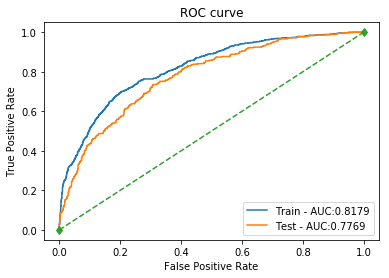

In [44]:
# 线性SVM
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8296 测试集： 0.7561
[精准率] 训练集： 0.9717 测试集： 0.5618
[召回率] 训练集： 0.3297 测试集： 0.1393
[f1-score] 训练集： 0.4924 测试集： 0.2232
[auc值] 训练集： 0.9457 测试集： 0.7130


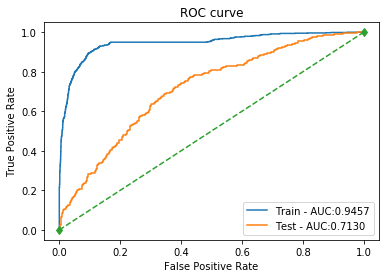

In [45]:
# 多项式SVM
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8413 测试集： 0.7786
[精准率] 训练集： 0.9069 测试集： 0.6838
[召回率] 训练集： 0.4089 测试集： 0.2228
[f1-score] 训练集： 0.5636 测试集： 0.3361
[auc值] 训练集： 0.9143 测试集： 0.7485


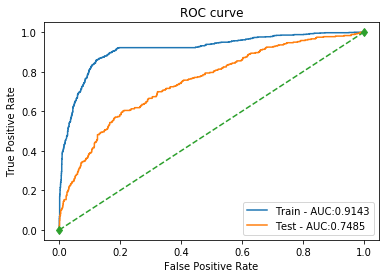

In [46]:
# 高斯核SVM
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7454 测试集： 0.7106
[精准率] 训练集： 0.4904 测试集： 0.4123
[召回率] 训练集： 0.3981 测试集： 0.3538
[f1-score] 训练集： 0.4394 测试集： 0.3808
[auc值] 训练集： 0.6719 测试集： 0.6569


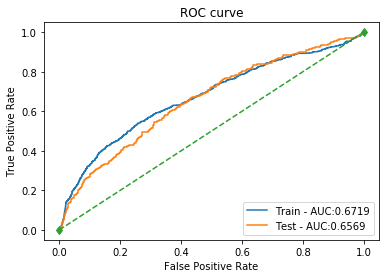

In [47]:
# sigmoid-SVM
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8028 测试集： 0.7589
[精准率] 训练集： 0.6648 测试集： 0.5311
[召回率] 训练集： 0.4305 测试集： 0.3565
[f1-score] 训练集： 0.5226 测试集： 0.4267
[auc值] 训练集： 0.7734 测试集： 0.6932


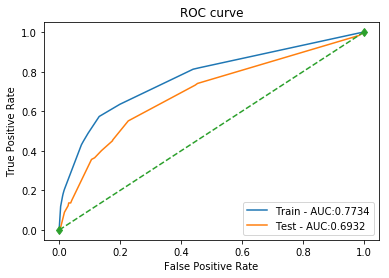

In [48]:
# 决策树
model_metrics(dt, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8028 测试集： 0.7589
[精准率] 训练集： 0.6648 测试集： 0.5311
[召回率] 训练集： 0.4305 测试集： 0.3565
[f1-score] 训练集： 0.5226 测试集： 0.4267
[auc值] 训练集： 0.7734 测试集： 0.6932


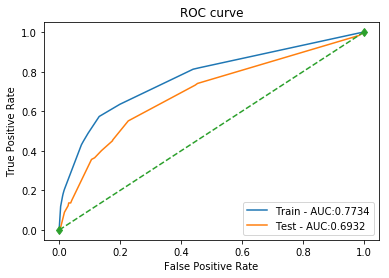

In [49]:
# 决策树
model_metrics(dt, X_train, X_test, y_train, y_test)